In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import wandb
api = wandb.Api()

sweep_ids = ['qbgnfywo', 'vkjp5t50', '08uxq26b', '25ufyhpa', 'tqe5rctl', 'xq185840', 'ks86lx43']

In [4]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(f'best{i+1}')
        f1_scores.append(run.summary['f1_score'])

In [5]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [6]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', 'f1_score'])
f1_df

,config,name,f1_score
0,baseline,celestial-sweep-1,0.978132
1,baseline,pleasant-sweep-2,0.967499
2,baseline,soft-sweep-3,0.980712
3,baseline,celestial-sweep-4,0.968429
4,baseline,happy-sweep-5,0.970251
5,best7,easy-sweep-1,0.974181
6,best7,swift-sweep-2,0.967669
7,best7,leafy-sweep-3,0.973878
8,best7,valiant-sweep-4,0.975746
9,best7,skilled-sweep-5,0.963921


In [8]:
f1_df.to_csv('logs/06_optimized_best.csv')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f1_df = pd.read_csv('logs/06_optimized_best.csv')

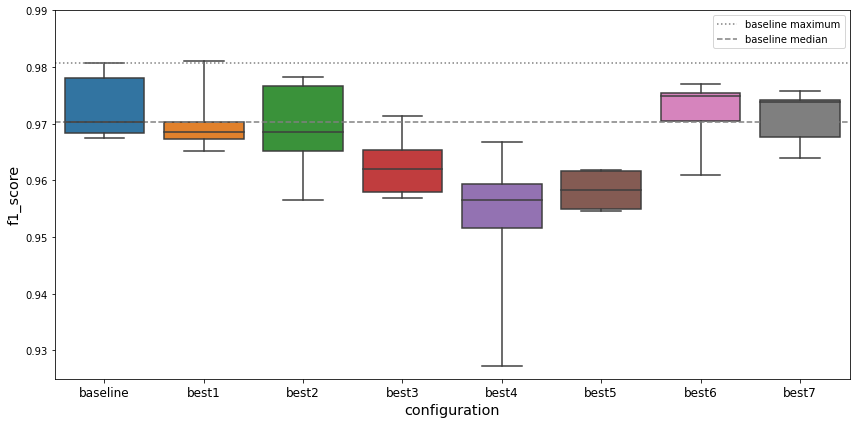

In [3]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='f1_score', data=f1_df, whis=100, order=sorted(f1_df['config'].unique()))
plt.ylim([0.925, 0.99])
plt.hlines(0.980712, -0.5, 7.5, linestyles='dotted', color='grey', label='baseline maximum')
plt.hlines(0.970251, -0.5, 7.5, linestyles='dashed', color='grey', label='baseline median')
ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large')
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/06_optimized_f1scores.pdf', dpi=300)